In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Import dataset
data = pd.read_csv("imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


##### Data Description:
* Poster_Link = Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year = Year at which that movie released
* Certificate = Certificate earned by that movie
* Runtime = Total runtime of the movie
* Genre = Genre of the movie
* IMDB_Rating = Rating of the movie at IMDB site
* Overview = mini story/ summary
* Meta_score = Score earned by the movie
* Director = Name of the Director
* Star1,Star2,Star3,Star4 = Name of the Stars
* No_of_votes = Total number of votes
* Gross = Money earned by that movie

### Step 1: Cleaning
Based on the Data Description, Poster_Link and Overview is unnecessary. Therefore, we will drop it.

In [4]:
data_clean = data.drop(columns=['Poster_Link', 'Overview'])

In [5]:
data_clean.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

We can observe that there's missing values. Therefore, we will drop all rows with no information regarding Gross income as we are looking for successful movies. However, we will fill the missing value of Meta_score with 0 and Certificate with NA and remove them if needed later on.

In [6]:
data_clean['Gross'] = data_clean['Gross'].str.replace(',', '')
data_clean['Gross'] = data_clean['Gross'].replace(np.nan, 0)
data_clean['Gross'] = data_clean['Gross'].astype(int)
data_clean.drop(data_clean[(data_clean['Gross'] == 0)].index, inplace = True)

data_clean['Meta_score'] = data_clean['Meta_score'].replace(np.nan, 0)
data_clean['Certificate'] = data_clean['Certificate'].replace(np.nan, 'Na')

In [7]:
data_clean.isna().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [8]:
#Check for duplicates.

data_clean.loc[data_clean.duplicated(subset=['Series_Title'])]

# No duplicates found.

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [9]:
# Genre contains up to 3 genre names, thus we will split it.
data_clean[['Genre1','Genre2','Genre3']] = data_clean['Genre'].str.split(pat=',',expand=True)
data_clean = data_clean.drop(columns=['Genre'])
data_clean.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

# Step 2: EDA

a) Genre

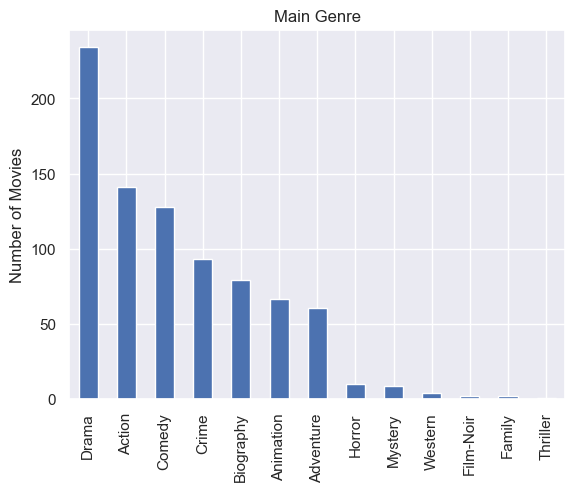

In [11]:
#Assume that the first apprear genre is the main genre for the movie, so we only analyze 'Genre1'.
genre_plt = data_clean['Genre1'].value_counts().plot(kind = 'bar', title = 'Main Genre')
genre_plt.set_ylabel('Number of Movies')
plt.show()

To find which movie genre that is most probably to succeed, we figure out the Genres which have top IMDB Ratings.

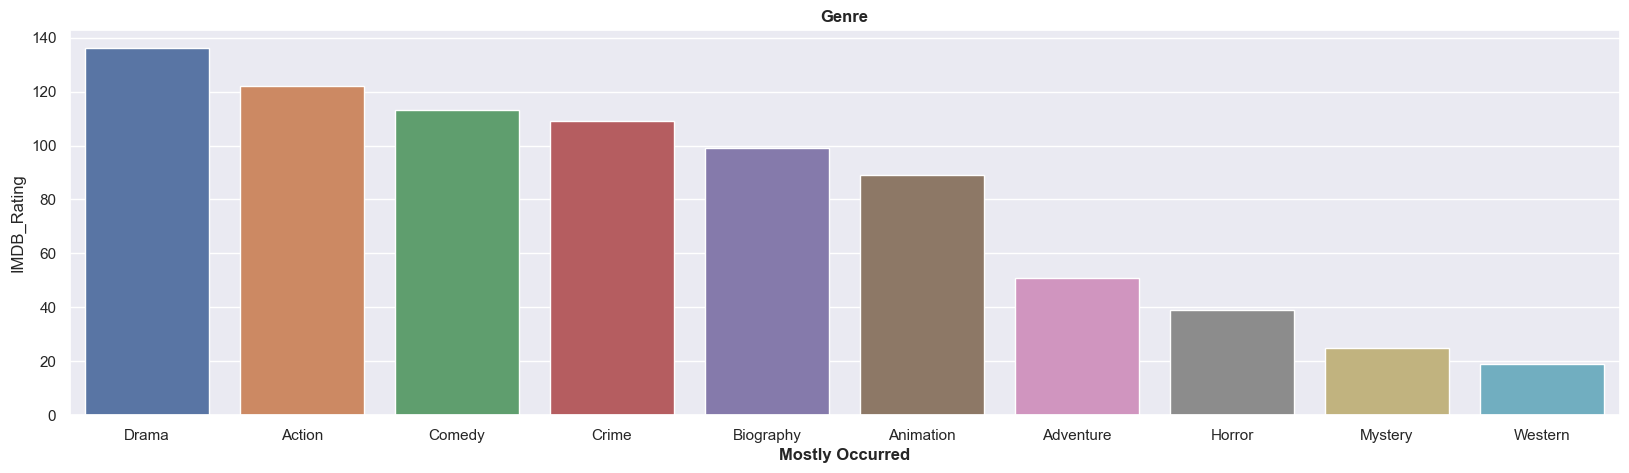

In [50]:
fig,axs=plt.subplots(figsize=(20,5))
g=sb.barplot(x=data_clean['Genre1'].value_counts()[:10].index,y=data_clean['IMDB_Rating'].value_counts().head(10))
g.set_title("Genre", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

Gross can be related to success, so we ranked the genres with their gross.

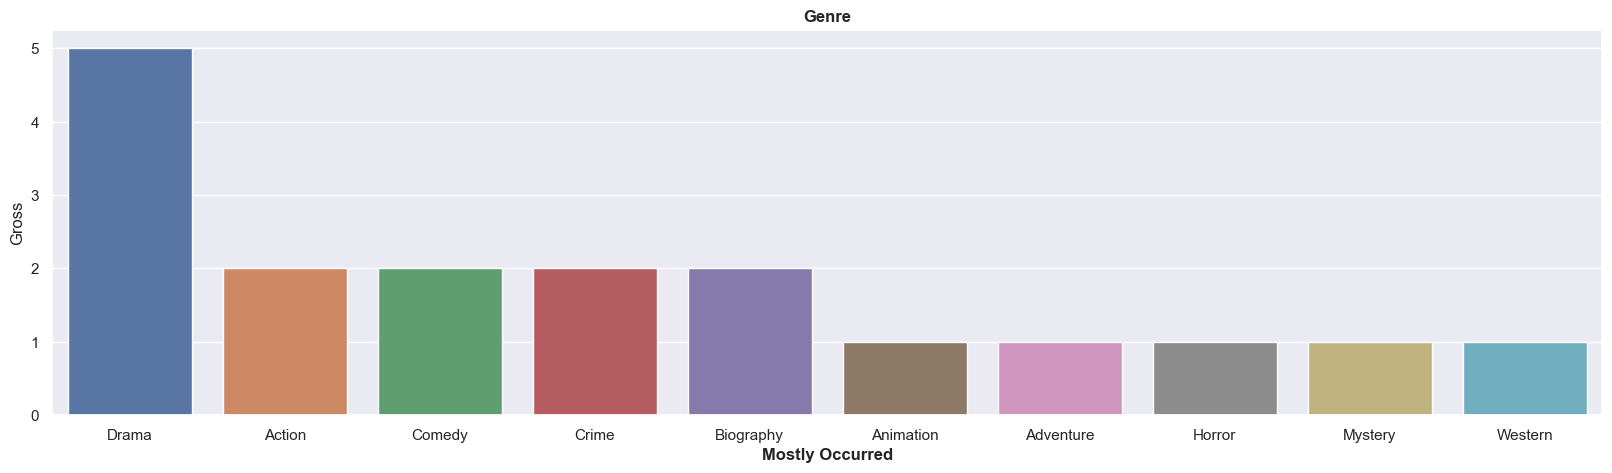

In [51]:
fig,axs=plt.subplots(figsize=(20,5))
g=sb.barplot(x=data_clean['Genre1'].value_counts()[:10].index,y=data_clean['Gross'].value_counts().head(10))
g.set_title("Genre", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

Median IMDB Rating and Genres

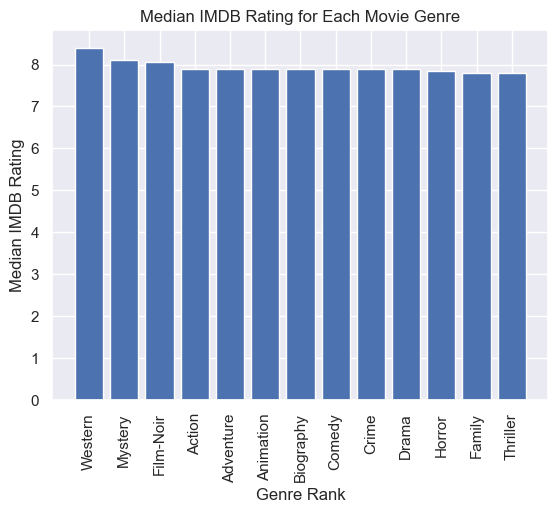

In [59]:
genre_rating = data_clean.groupby('Genre1')['IMDB_Rating'].median().sort_values(ascending=False)
ranked_genres = genre_rating.rank(method='dense', ascending=False)
plt.bar(range(len(ranked_genres)), genre_rating.values)
plt.xticks(range(len(ranked_genres)), ranked_genres.index, rotation=90)
plt.xlabel('Genre Rank')
plt.ylabel('Median IMDB Rating')
plt.title('Median IMDB Rating for Each Movie Genre')
plt.show()

Median Gross and Genres

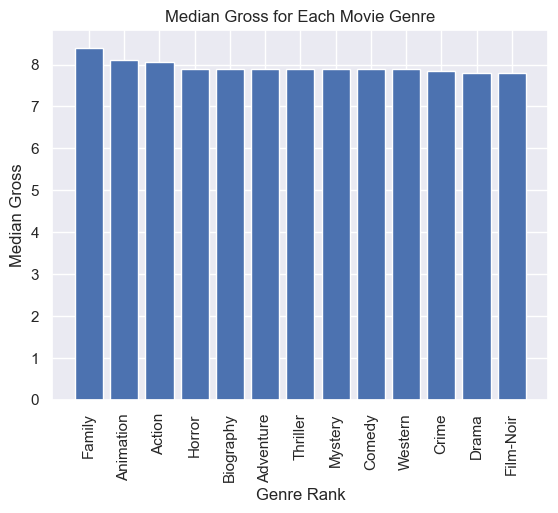

In [60]:
genre_rating_gross = data_clean.groupby('Genre1')['Gross'].median().sort_values(ascending=False)
ranked_genres = genre_rating_gross.rank(method='dense', ascending=False)
plt.bar(range(len(ranked_genres_gross)), genre_rating.values)
plt.xticks(range(len(ranked_genres_gross)), ranked_genres_gross.index, rotation=90)
plt.xlabel('Genre Rank')
plt.ylabel('Median Gross')
plt.title('Median Gross for Each Movie Genre')
plt.show()

b) Actors

First, we analyze the appearance of actors in top movies

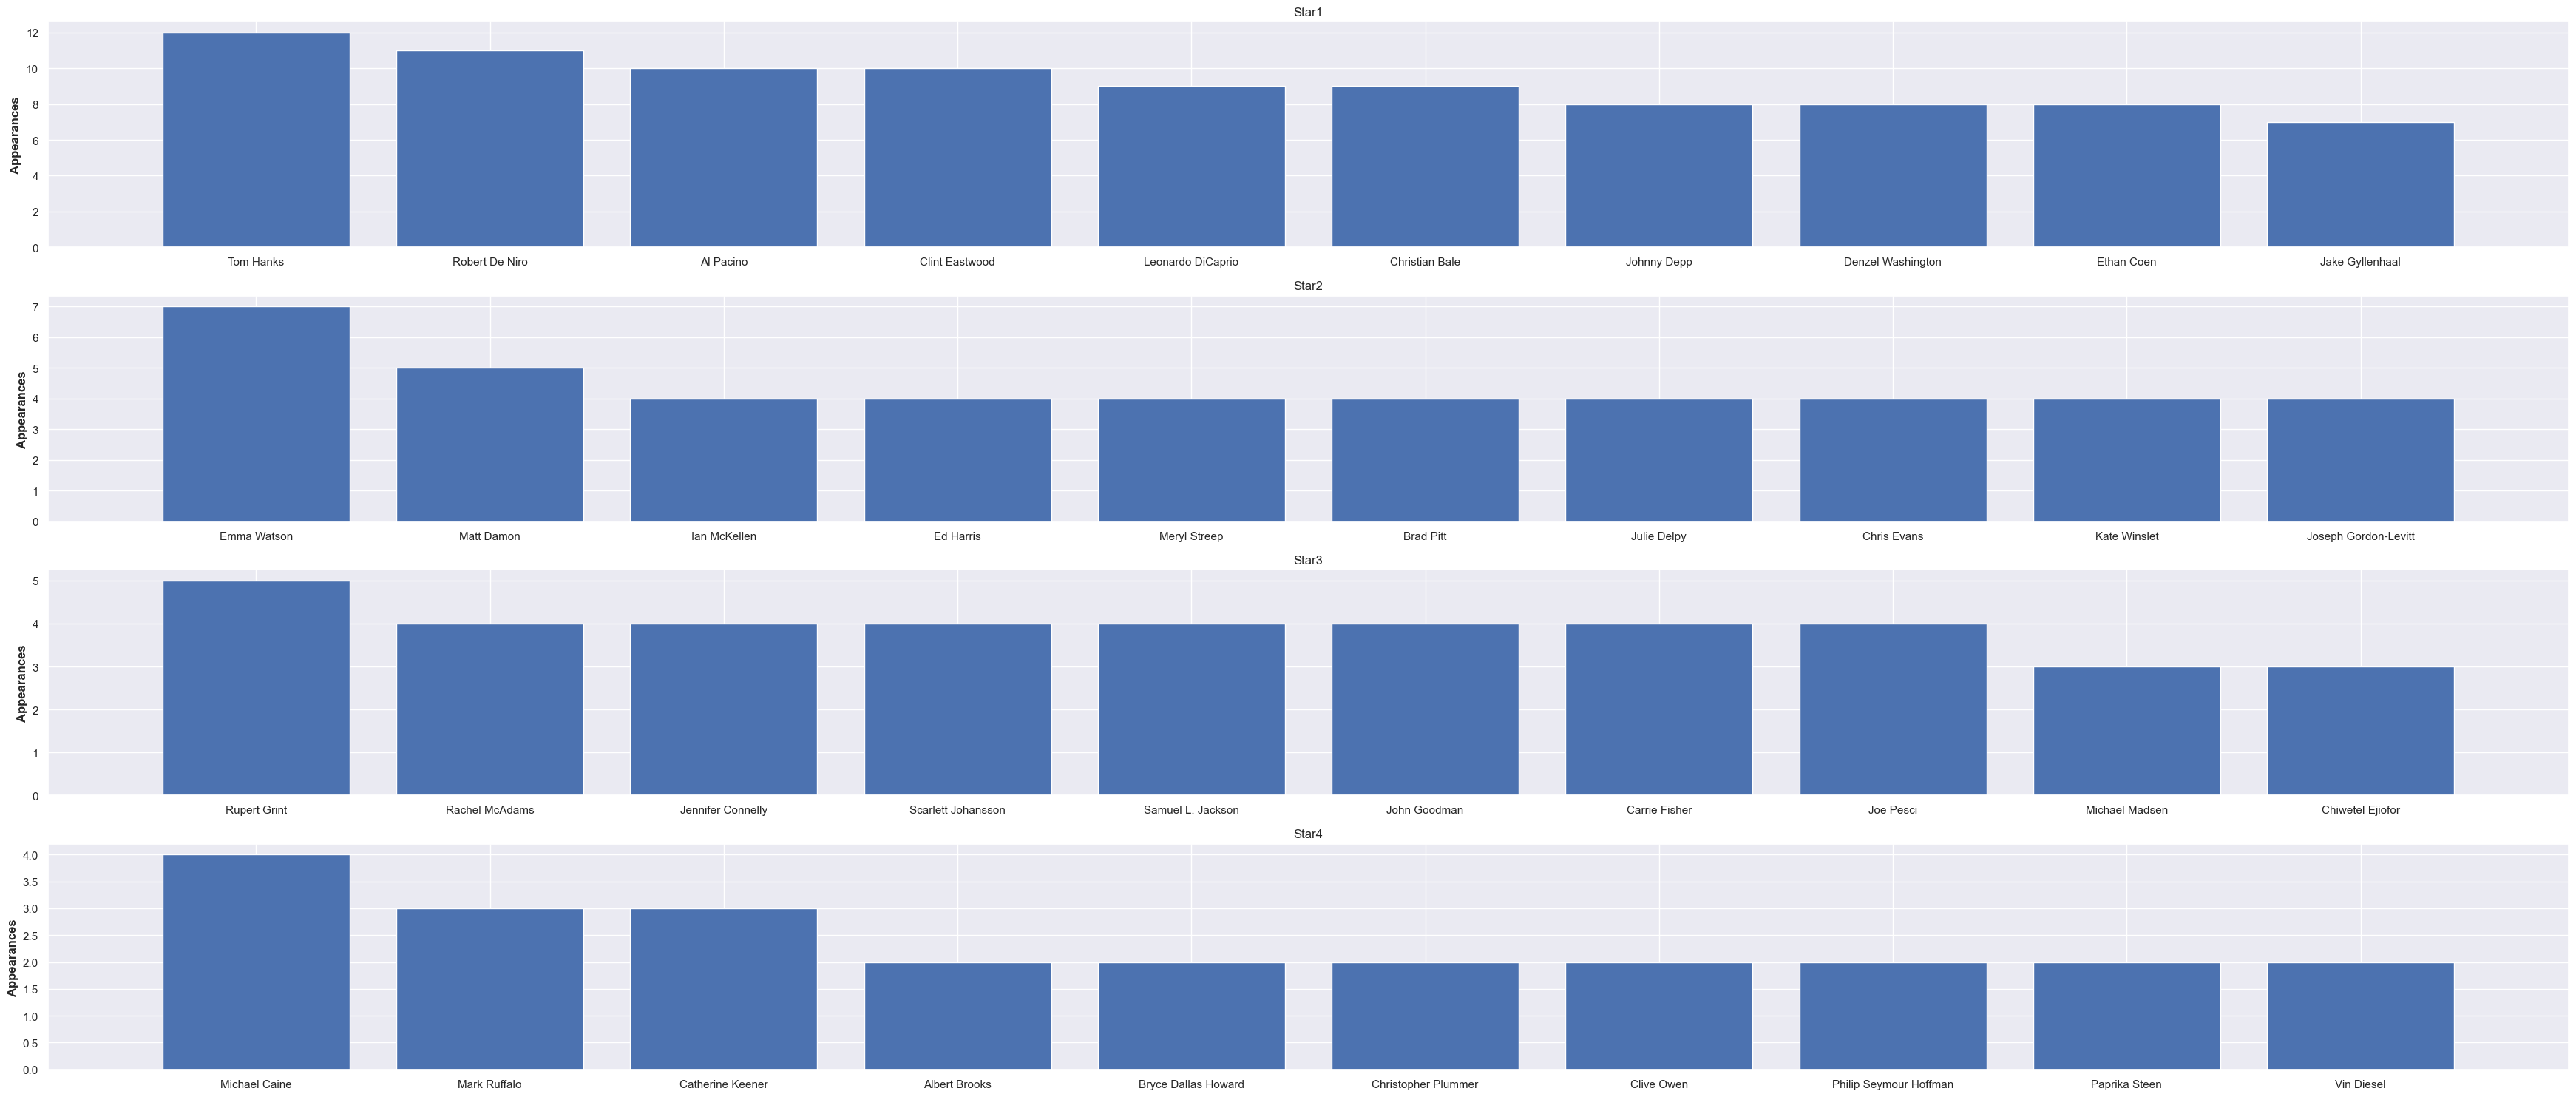

In [35]:
stars=data_clean[['Star1','Star2','Star3','Star4']]
fig,axs=plt.subplots(4,1,figsize=(35,15))
ax=0
for x in stars:
    axs[ax].bar(data_clean[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

Then to analyze their appearance related to the IMDB Rating

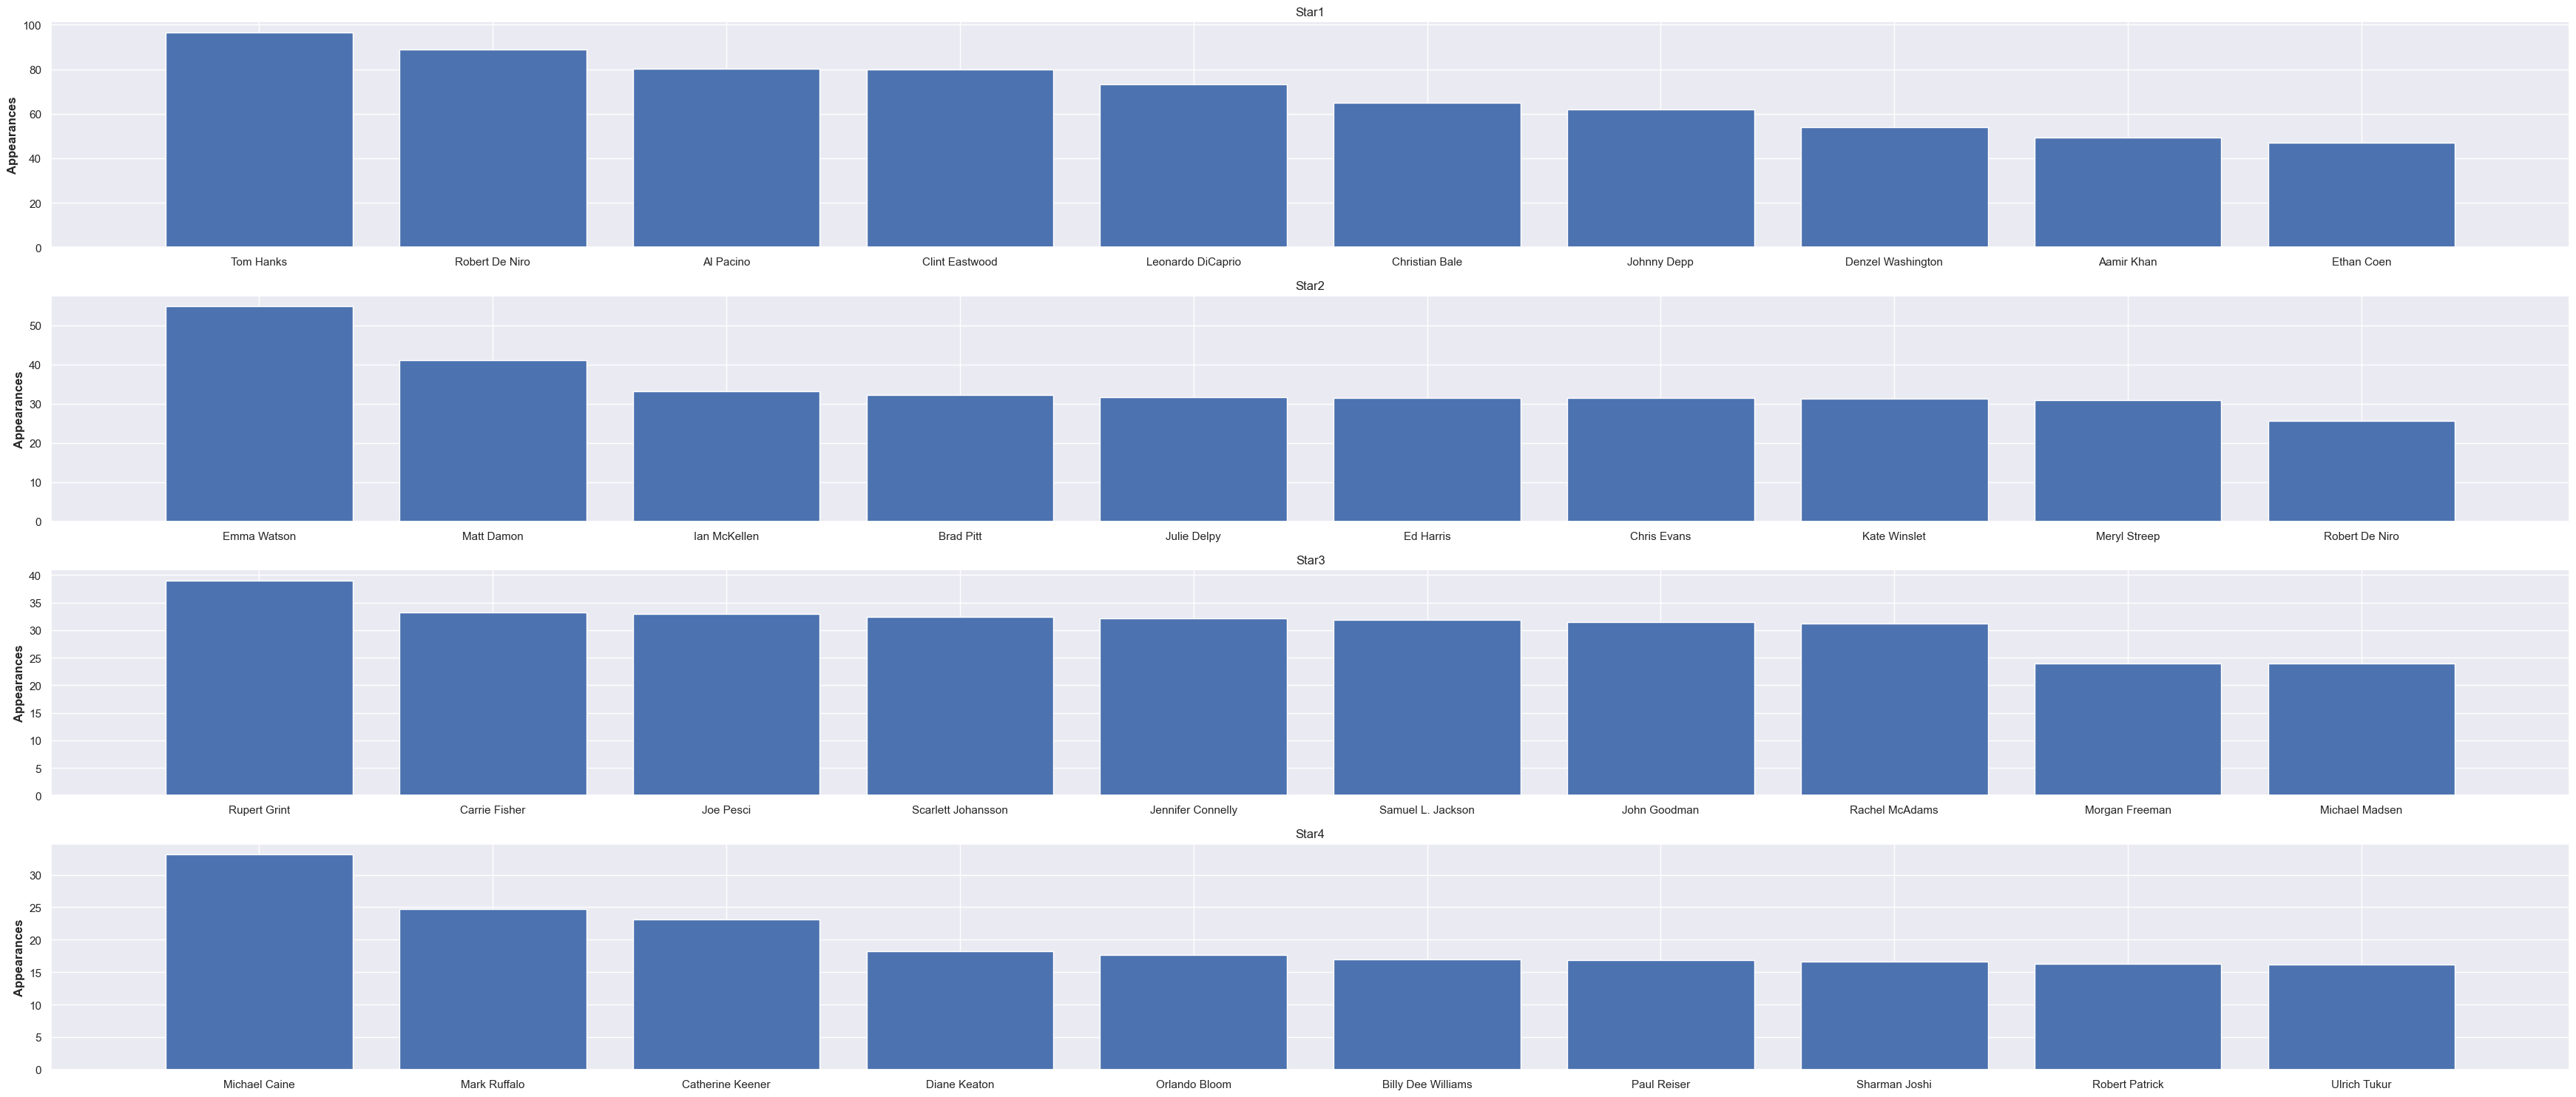

In [36]:
stars=data_clean[['Star1','Star2','Star3','Star4']]
fig,axs=plt.subplots(4,1,figsize=(35,15))
ax=0
for x in stars:
    s=data_clean.groupby([x]).sum().reset_index()
    d=s.sort_values(['IMDB_Rating'],ascending=False)[:10]
    axs[ax].bar(d[x],d['IMDB_Rating'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

Now we analyze the appearance of actors related to the gross

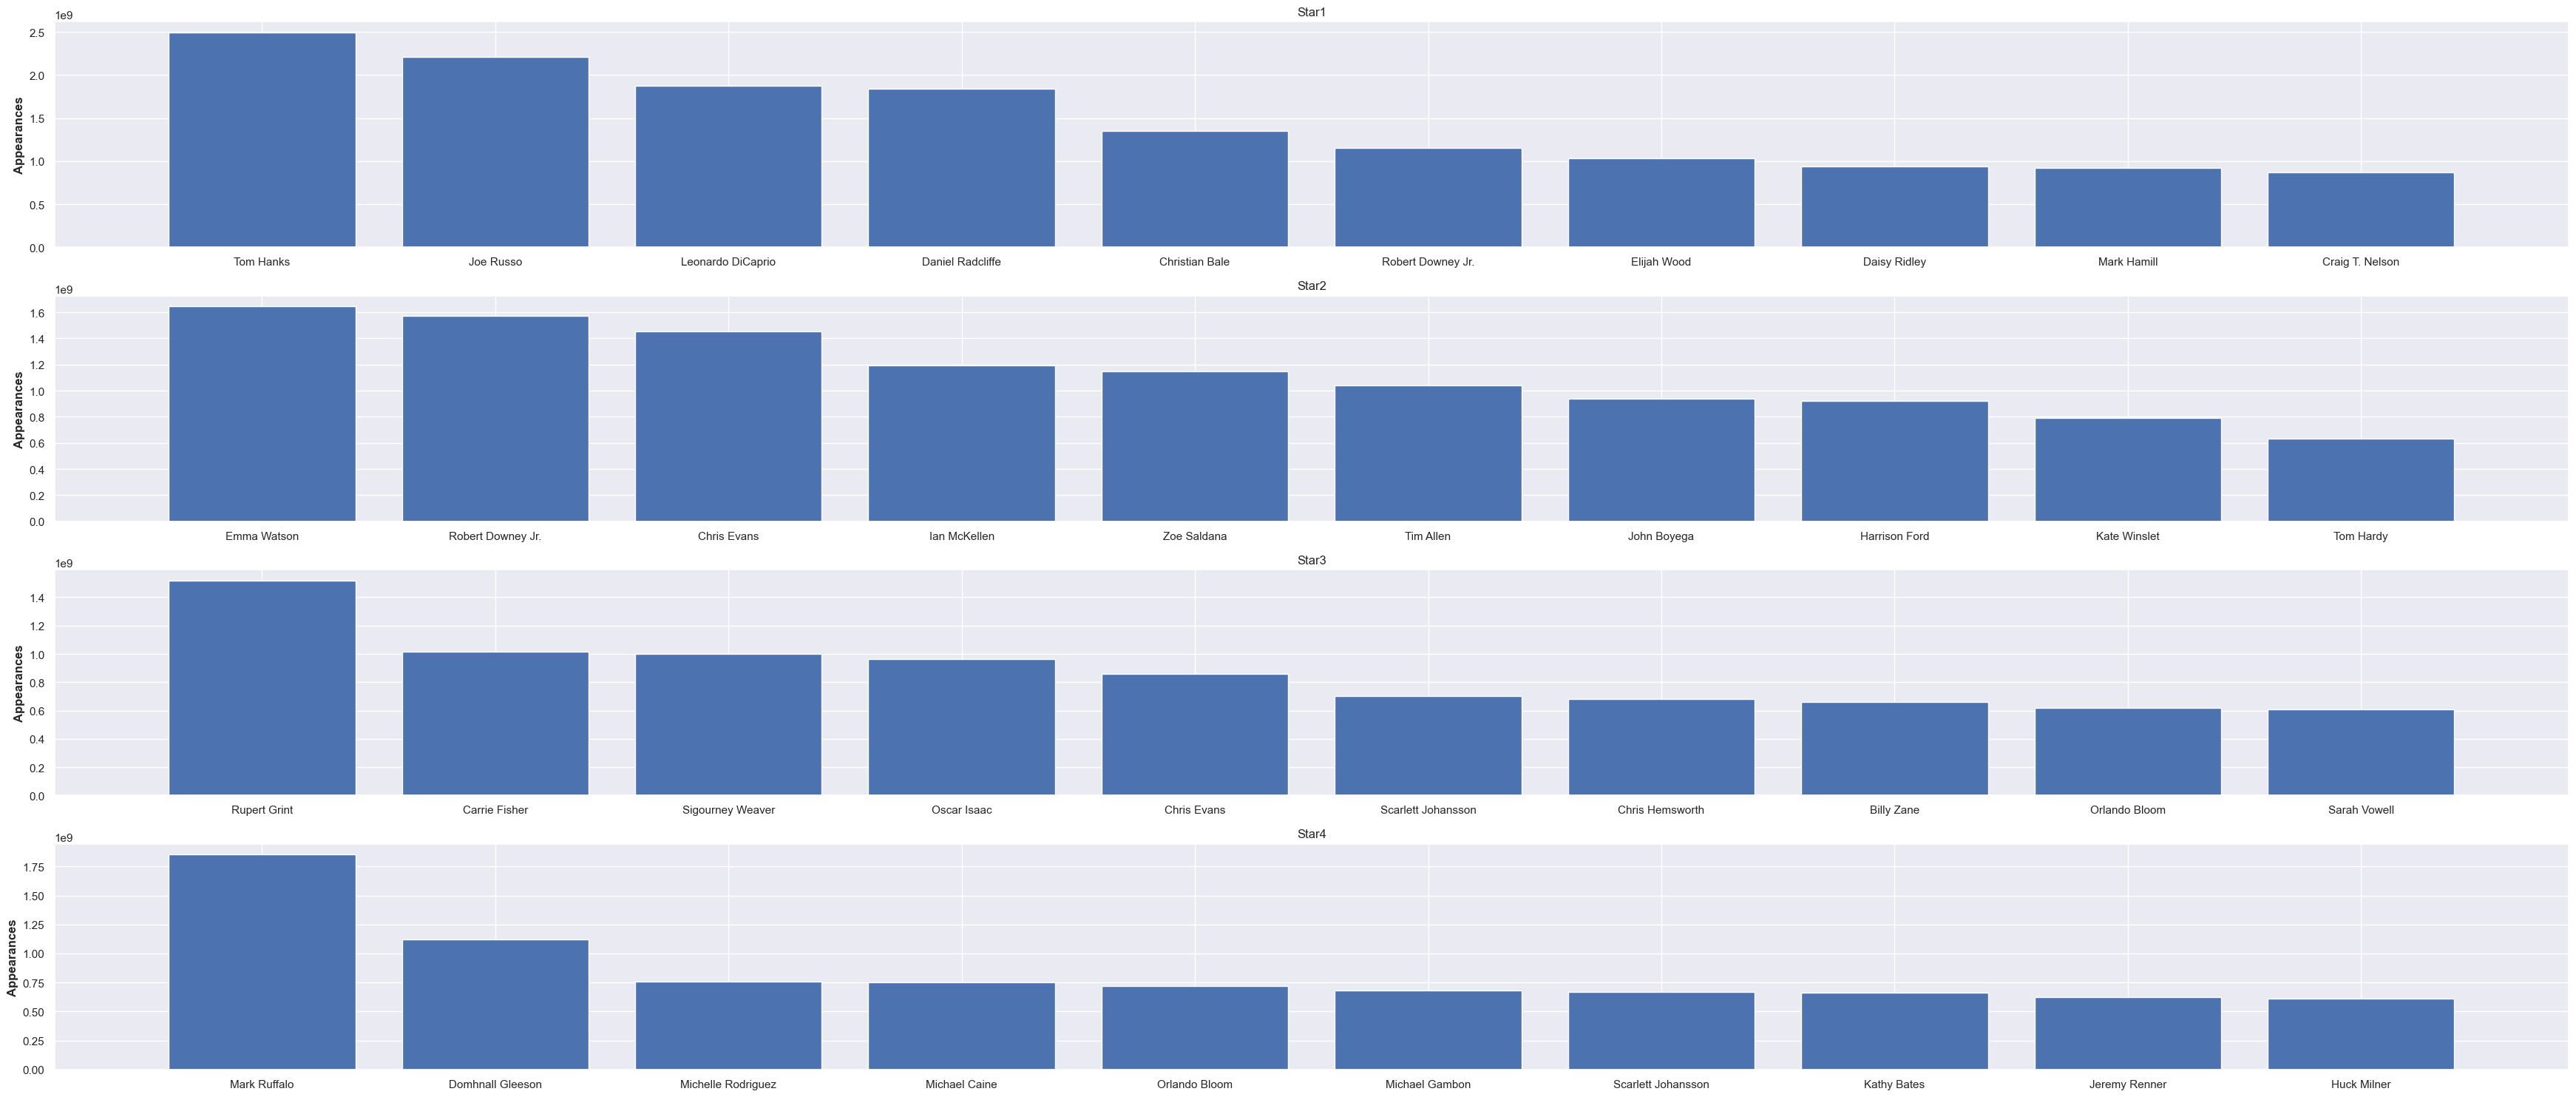

In [37]:
stars=data_clean[['Star1','Star2','Star3','Star4']]
fig,axs=plt.subplots(4,1,figsize=(35,15))
ax=0
for x in stars:
    s=data_clean.groupby([x]).sum().reset_index()
    d=s.sort_values(['Gross'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Gross'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

Median main stars(star1) with IMDB Rating

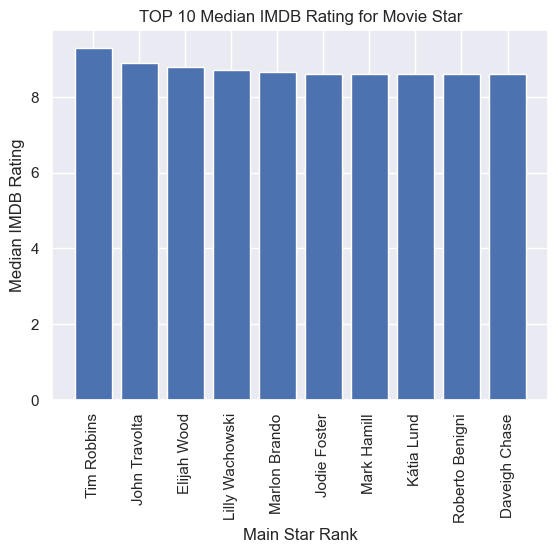

In [61]:
main_star_rating = data_clean.groupby('Star1')['IMDB_Rating'].median().sort_values(ascending=False).head(10)
ranked_main_star = main_star_rating.rank(method='dense', ascending=False)
plt.bar(range(len(main_star_rating)), main_star_rating.values)
plt.xticks(range(len(main_star_rating)), main_star_rating.index, rotation=90)
plt.xlabel('Main Star Rank')
plt.ylabel('Median IMDB Rating')
plt.title('TOP 10 Median IMDB Rating for Movie Star')
plt.show()

Median Gross with Main Star

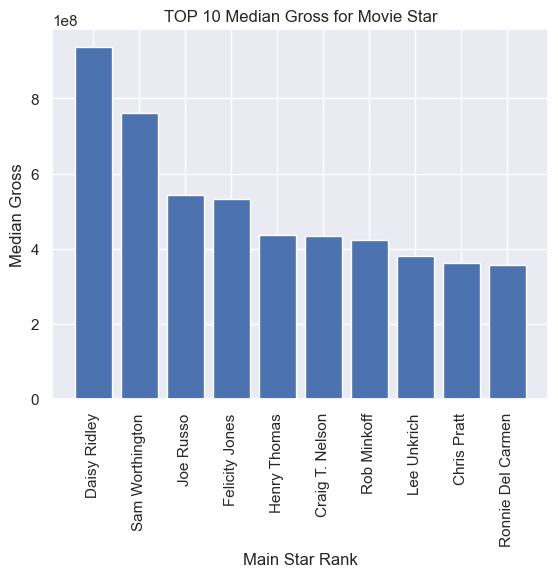

In [62]:
main_star_gross = data_clean.groupby('Star1')['Gross'].median().sort_values(ascending=False).head(10)
ranked_main_star_gross = main_star_gross.rank(method='dense', ascending=False)
plt.bar(range(len(main_star_gross)), main_star_gross.values)
plt.xticks(range(len(main_star_gross)), main_star_gross.index, rotation=90)
plt.xlabel('Main Star Rank')
plt.ylabel('Median Gross')
plt.title('TOP 10 Median Gross for Movie Star')
plt.show()

c) Directors

Thirdly, we analyze the top 10 directors for the top rated movies

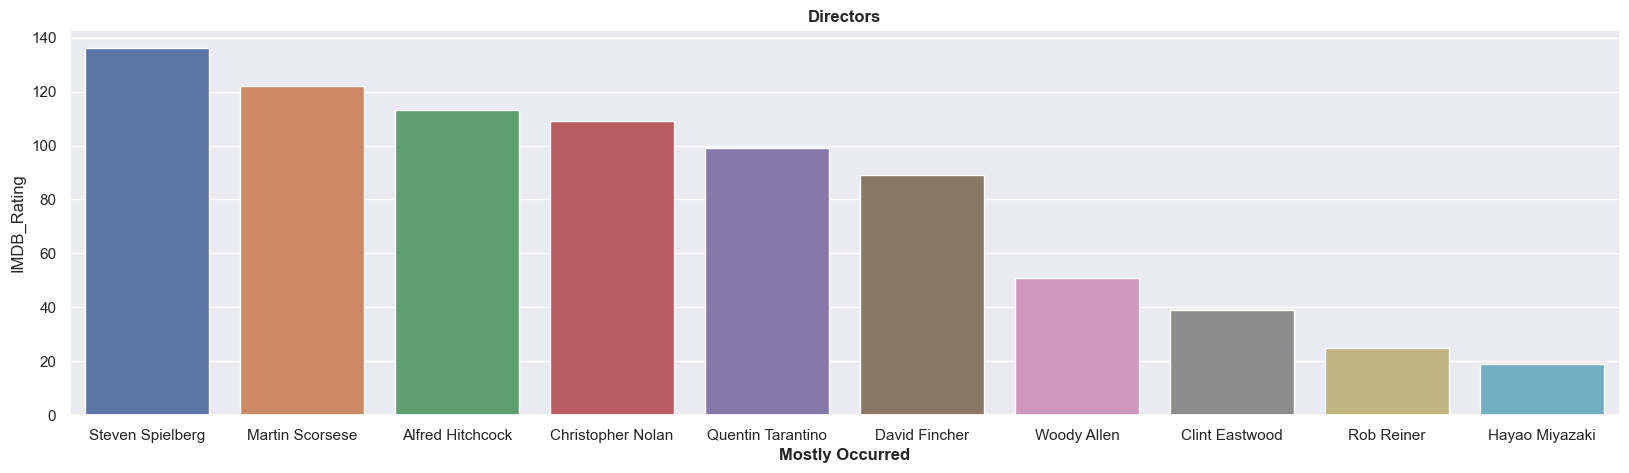

In [49]:
fig,axs=plt.subplots(figsize=(20,5))
g=sb.barplot(x=data_clean['Director'].value_counts()[:10].index,y=data_clean['IMDB_Rating'].value_counts().head(10))
g.set_title("Directors", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

Directors which most occured in the top movies

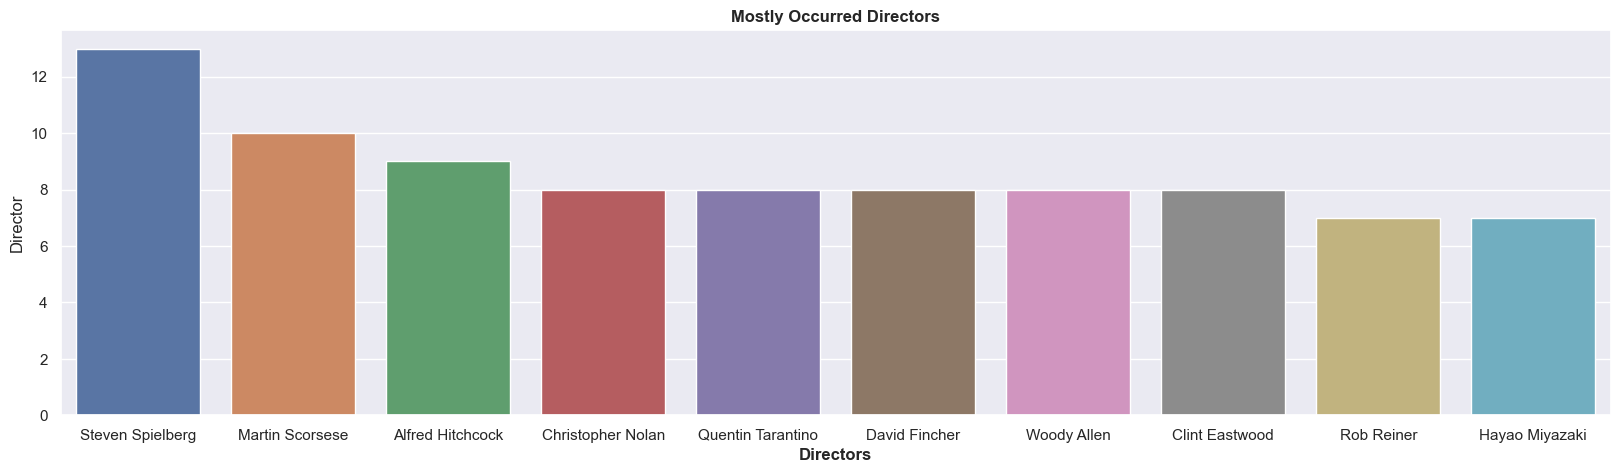

In [45]:
fig,axs=plt.subplots(figsize=(20,5))
g=sb.barplot(x=data_clean['Director'].value_counts()[:10].index,y=data_clean['Director'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

Directors which moslt occured with respect to gross

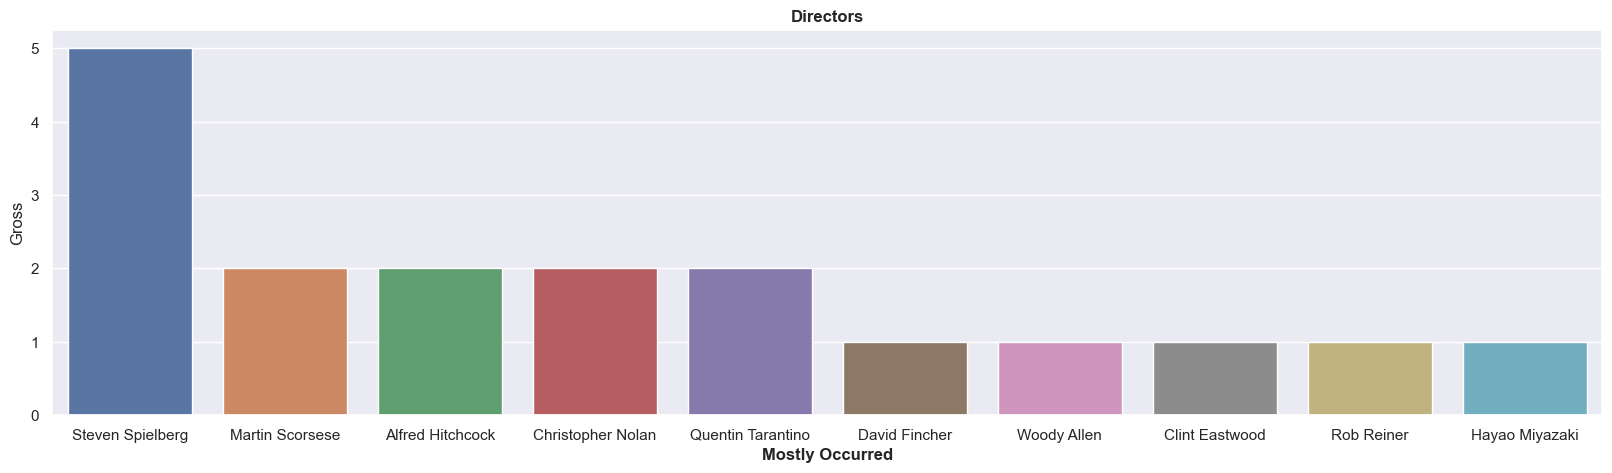

In [46]:
fig,axs=plt.subplots(figsize=(20,5))
g=sb.barplot(x=data_clean['Director'].value_counts()[:10].index,y=data_clean['Gross'].value_counts()[:10])
g.set_title("Directors", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

Median IMDB Rating with directors

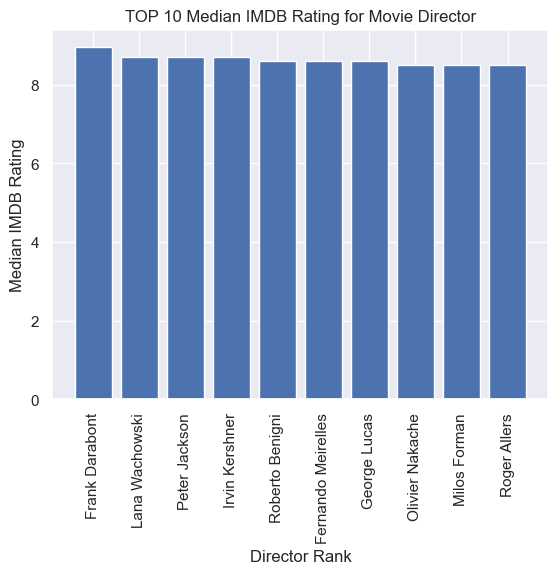

In [63]:
director_rating = data_clean.groupby('Director')['IMDB_Rating'].median().sort_values(ascending=False).head(10)
ranked_director = director_rating.rank(method='dense', ascending=False)
plt.bar(range(len(director_rating)), director_rating.values)
plt.xticks(range(len(director_rating)), director_rating.index, rotation=90)
plt.xlabel('Director Rank')
plt.ylabel('Median IMDB Rating')
plt.title('TOP 10 Median IMDB Rating for Movie Director')
plt.show()

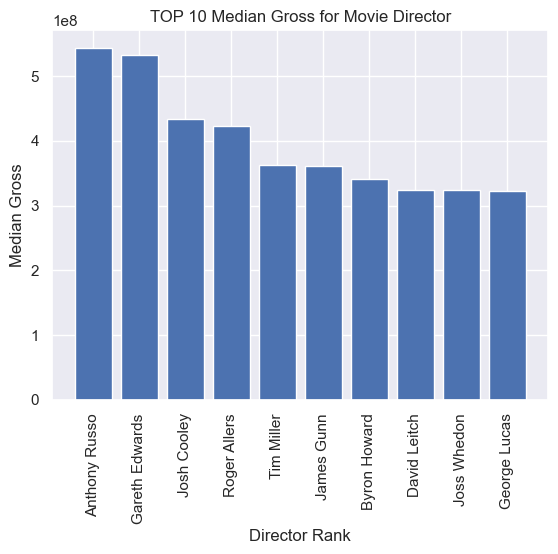

In [64]:
director_gross = data_clean.groupby('Director')['Gross'].median().sort_values(ascending=False).head(10)
ranked_director_gross = director_gross.rank(method='dense', ascending=False)
plt.bar(range(len(director_gross)), director_gross.values)
plt.xticks(range(len(director_gross)), director_gross.index, rotation=90)
plt.xlabel('Director Rank')
plt.ylabel('Median Gross')
plt.title('TOP 10 Median Gross for Movie Director')
plt.show()